In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df=pd.read_csv('imputed_data.csv')
df.head()

,Unnamed: 0,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,996,130,0.006,0.002000,0.002,0.004,0.0,0.0,53,1.7,...,179.0,7.0,0.0,144.0,137.0,141.0,31.0,0,6,1
1,106,136,0.006,0.000000,0.006,0.003,0.0,0.0,36,1.2,...,167.0,2.0,0.0,147.0,140.0,145.0,16.0,1,6,1
2,1373,120,0.000,0.000523,0.004,0.000,0.0,0.0,38,1.3,...,162.0,6.0,0.0,119.0,118.0,120.0,4.0,-1,3,1
3,1424,140,0.003,0.001000,0.007,0.004,0.0,0.0,63,1.2,...,161.0,4.0,0.0,143.0,136.0,143.0,19.0,1,6,1
4,125,126,0.000,0.000000,0.003,0.000,0.0,0.0,56,0.5,...,143.0,2.0,0.0,129.0,127.0,129.0,1.0,0,1,1


In [2]:
df=df.iloc[:,1:]
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,130,0.006,0.002000,0.002,0.004,0.0,0.0,53,1.7,0.00000,...,179.0,7.0,0.0,144.0,137.0,141.0,31.0,0,6,1
1,136,0.006,0.000000,0.006,0.003,0.0,0.0,36,1.2,12.00000,...,167.0,2.0,0.0,147.0,140.0,145.0,16.0,1,6,1
2,120,0.000,0.000523,0.004,0.000,0.0,0.0,38,1.3,0.00000,...,162.0,6.0,0.0,119.0,118.0,120.0,4.0,-1,3,1
3,140,0.003,0.001000,0.007,0.004,0.0,0.0,63,1.2,0.00000,...,161.0,4.0,0.0,143.0,136.0,143.0,19.0,1,6,1
4,126,0.000,0.000000,0.003,0.000,0.0,0.0,56,0.5,6.09215,...,143.0,2.0,0.0,129.0,127.0,129.0,1.0,0,1,1


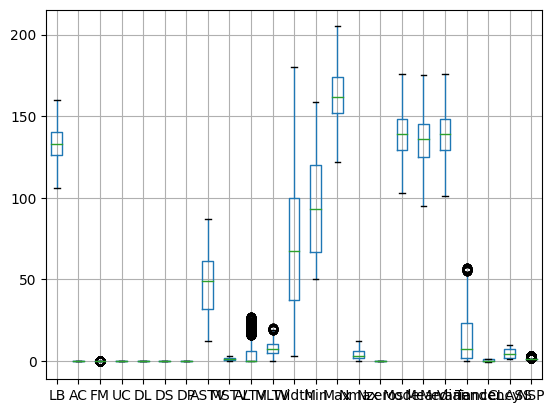

In [3]:
df.boxplot()
plt.show()

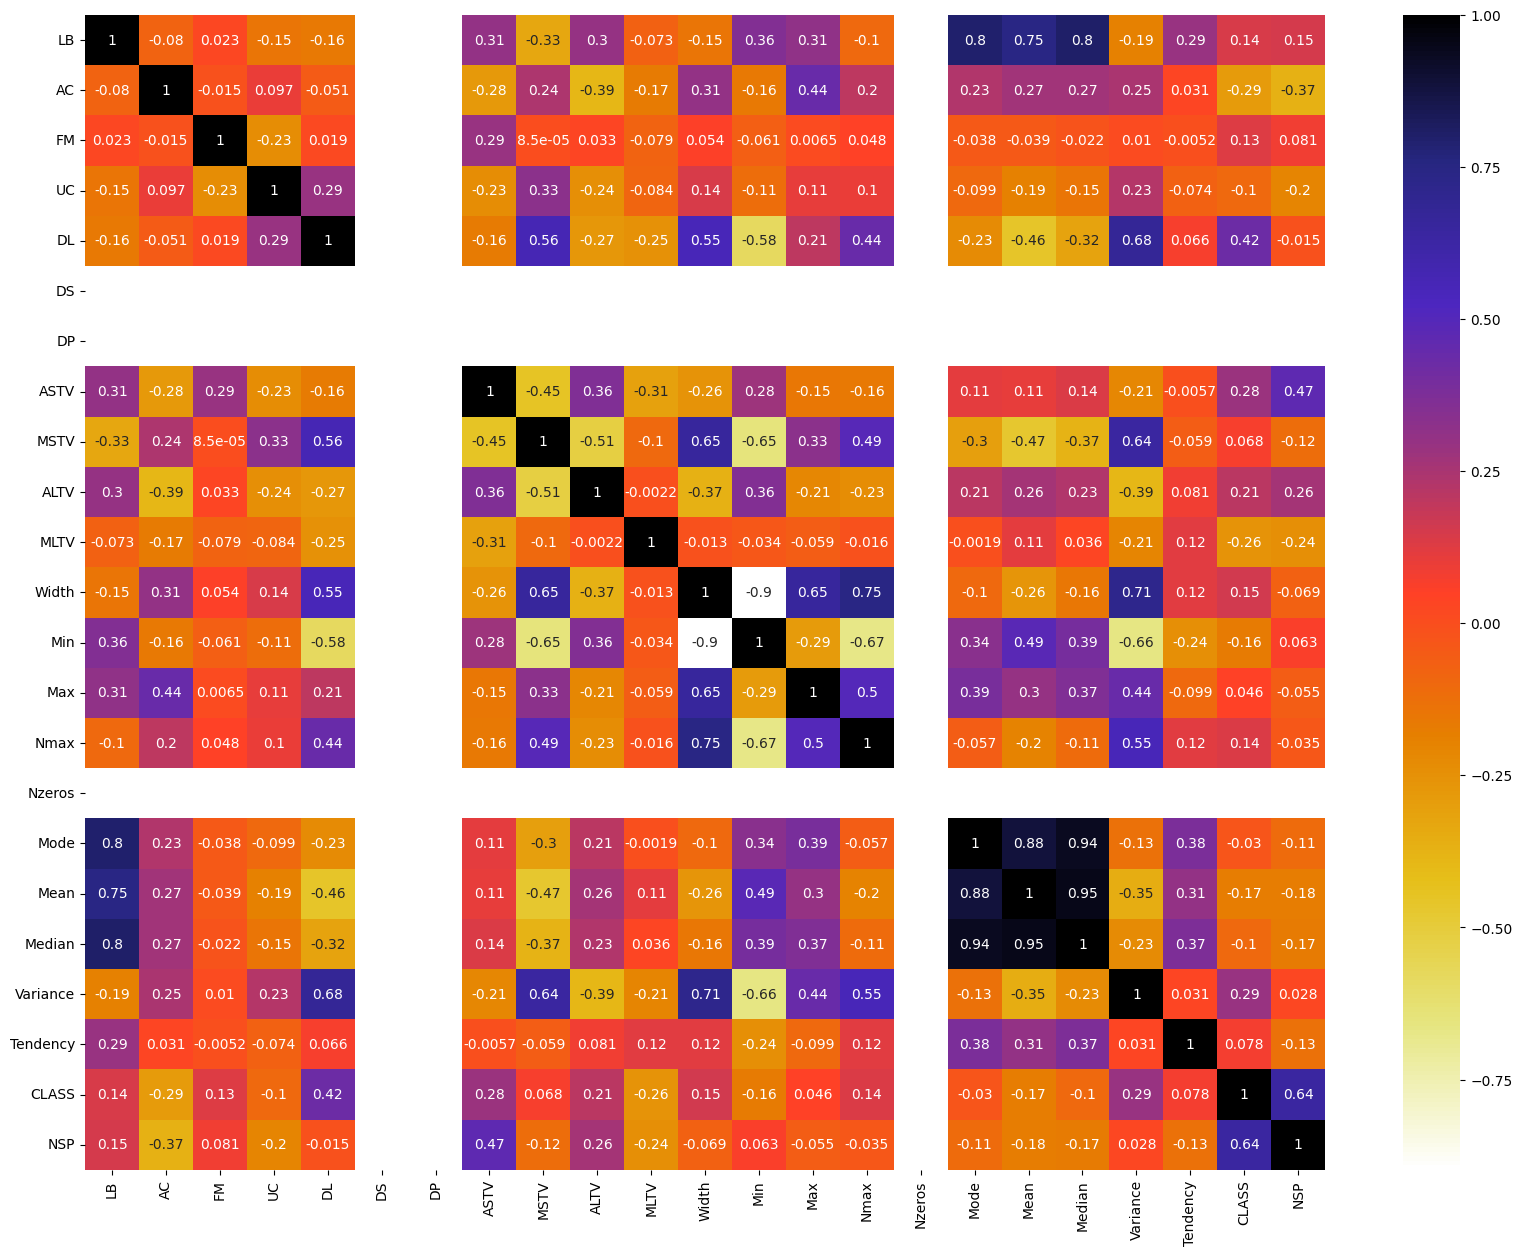

In [4]:
cor = df.corr()                   
plt.figure(figsize=(20,15))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

# Παρατηρούμε αρκετές ισχυρές συσχετίσεις μεταξύ των επεξηγηματικών μεταβλητών μας

In [5]:
num_feats=df.iloc[:,0:21]
cat_feats=df.iloc[:,21:23]
num_feats.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,130,0.006,0.002000,0.002,0.004,0.0,0.0,53,1.7,0.00000,...,106,73,179.0,7.0,0.0,144.0,137.0,141.0,31.0,0
1,136,0.006,0.000000,0.006,0.003,0.0,0.0,36,1.2,12.00000,...,79,88,167.0,2.0,0.0,147.0,140.0,145.0,16.0,1
2,120,0.000,0.000523,0.004,0.000,0.0,0.0,38,1.3,0.00000,...,59,103,162.0,6.0,0.0,119.0,118.0,120.0,4.0,-1
3,140,0.003,0.001000,0.007,0.004,0.0,0.0,63,1.2,0.00000,...,68,93,161.0,4.0,0.0,143.0,136.0,143.0,19.0,1
4,126,0.000,0.000000,0.003,0.000,0.0,0.0,56,0.5,6.09215,...,27,116,143.0,2.0,0.0,129.0,127.0,129.0,1.0,0


In [6]:
pca=PCA()
scaler=StandardScaler()
num_feats=scaler.fit_transform(num_feats)
X=pca.fit_transform(num_feats)
np.round(pca.explained_variance_ratio_,4)

array([0.3197, 0.2009, 0.0949, 0.0782, 0.0671, 0.0516, 0.0408, 0.0335,
       0.0288, 0.0209, 0.0179, 0.0145, 0.0114, 0.0071, 0.0067, 0.0039,
       0.0014, 0.0006, 0.    , 0.    , 0.    ])

In [7]:
pca=PCA(n_components=8)
X=pca.fit_transform(num_feats)
pca.explained_variance_ratio_.sum()

0.8866901485506127

In [8]:
pca=PCA(n_components=0.90)
X=pca.fit_transform(num_feats)
pca.explained_variance_ratio_.sum()

0.915520918000636

In [9]:
X.shape

(2126, 9)

# Με 11 διατηρούμε τουλάχιστον 95.4% της μεταβλητότητας/πληροφορίας

In [10]:
pca=PCA(n_components=0.95)
X=pca.fit_transform(num_feats)
pca.explained_variance_ratio_.sum()

0.954396859477952

In [11]:
X.shape

(2126, 11)

# Οπότε με 8: 81.2% με 9: 91.5% (+3% δηλαδή) και με 11: 95%(+2%)
# Θα κρατήσουμε τις 11 συνιστώσες. και μπορουμε να βγαλουμε επιπλεον στο feature selection

In [12]:
X=pd.DataFrame(X)

In [13]:
df=pd.concat([X,cat_feats],axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,CLASS,NSP
0,1.893165,1.650475,1.312940,-1.147536,0.903666,-0.205021,-0.340956,-0.632305,0.100976,-0.170939,-0.604369,6,1
1,-0.324396,1.162099,-0.198065,0.184307,-1.243512,-0.623147,-0.504387,0.225404,1.362092,-0.717740,0.427014,6,1
2,1.165958,-2.718659,-1.330906,0.404862,1.376120,2.055441,0.456543,0.130079,-0.659648,0.387542,-0.638878,3,1
3,0.138297,0.837828,0.874071,-0.313277,-1.330037,-1.095468,0.669641,0.118515,-0.783989,-0.274855,-0.282810,6,1
4,-1.363084,-2.703758,-0.036290,-0.119268,-0.060728,0.049487,-0.691821,-0.002055,-0.365291,0.028245,-0.234460,1,1


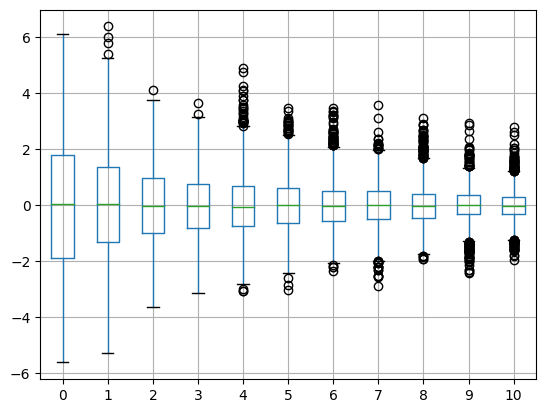

In [14]:
df.iloc[:,0:11].boxplot()
plt.show()

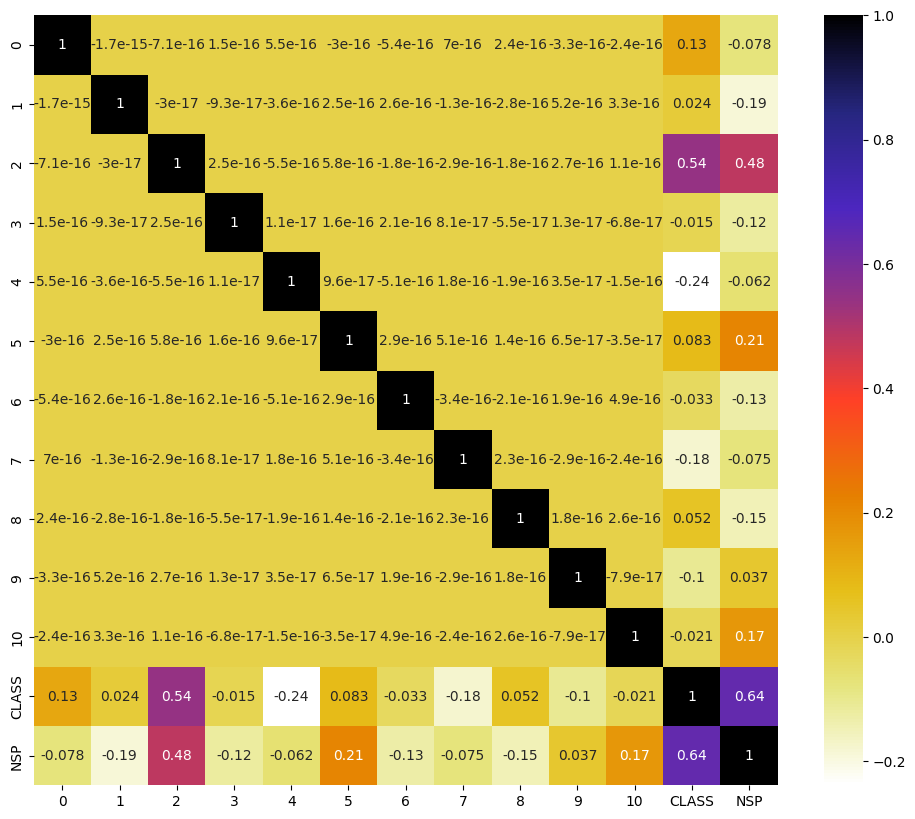

In [15]:
cor = df.corr()                   
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

# Όπως αναμέναμε δεν υπάρχει πλέον συσχέτιση μεταξύ των επεξηγηματικών features

# df.to_csv('imputed_PCAed_data.csv')

# df = df.sample(frac = 1) #shuffle καθως οι παρατηρησεις ειναι γραμμενες κατα ομαδα και θα θελησουμε να τις splitαρουμε μετα
# df.to_csv('mean_data.csv')